## Task 4: Advanced Neural Network

In [1]:
# Create train and test data and flatten it
from cifar10helper import load_cifar10


# Load binary classification data (airplane vs rest)
x_train_binary, y_train_binary, x_test_binary, y_test_binary = load_cifar10(binary=True, target_class=0)

# Load categorical classification data
x_train_categorical, y_train_categorical, x_test_categorical, y_test_categorical = load_cifar10(binary=False)
y_train_categorical = y_train_categorical.astype(int)  # Ensure labels are integers
y_test_categorical = y_test_categorical.astype(int)


In [2]:
# Import neural network and plotting
from neuralnetwork import *
from task4neuralnetworkplus import *
from plot import plot_confusion_matrix_and_f1, plot_history
import cupy as cp
import matplotlib.pyplot as plt

### Part 1: Compare Momentum vs SGD

In [3]:
# Binary classification with SGD
optimizer_sgd = SGD(learning_rate=0.01)
model_sgd = EnhancedNeuralNetwork([
    EnhancedDenseLayer(3072, 64, activation=ReLU),
    EnhancedDenseLayer(64, 1, activation=Sigmoid)
], optimizer=optimizer_sgd)

print("Training with SGD...")
history_sgd = model_sgd.train(x_train_binary, y_train_binary, x_test_binary, y_test_binary,
                              epochs=30, learning_rate=0.01, batch_size=128,
                              classification_task=BinaryClassification)


Training with SGD...
Epoch 1/30 | Loss: 0.4800 | Acc: 0.8594 | Val Loss: 0.3842 | Val Acc: 0.8752
Epoch 2/30 | Loss: 0.3489 | Acc: 0.9052 | Val Loss: 0.3277 | Val Acc: 0.8754
Epoch 3/30 | Loss: 0.3099 | Acc: 0.9083 | Val Loss: 0.3008 | Val Acc: 0.8741
Epoch 4/30 | Loss: 0.2889 | Acc: 0.9102 | Val Loss: 0.2847 | Val Acc: 0.8731
Epoch 5/30 | Loss: 0.2760 | Acc: 0.9112 | Val Loss: 0.2745 | Val Acc: 0.8723
Epoch 6/30 | Loss: 0.2676 | Acc: 0.9119 | Val Loss: 0.2677 | Val Acc: 0.8719
Epoch 7/30 | Loss: 0.2620 | Acc: 0.9125 | Val Loss: 0.2631 | Val Acc: 0.8720
Epoch 8/30 | Loss: 0.2582 | Acc: 0.9132 | Val Loss: 0.2600 | Val Acc: 0.8719
Epoch 9/30 | Loss: 0.2558 | Acc: 0.9137 | Val Loss: 0.2580 | Val Acc: 0.8716
Epoch 10/30 | Loss: 0.2541 | Acc: 0.9141 | Val Loss: 0.2566 | Val Acc: 0.8712
Epoch 11/30 | Loss: 0.2530 | Acc: 0.9147 | Val Loss: 0.2556 | Val Acc: 0.8713
Epoch 12/30 | Loss: 0.2522 | Acc: 0.9150 | Val Loss: 0.2549 | Val Acc: 0.8710
Epoch 13/30 | Loss: 0.2516 | Acc: 0.9155 | Val Loss:

In [4]:
# Binary classification with Momentum
optimizer_momentum = Momentum(learning_rate=0.01, momentum=0.9)
model_momentum = EnhancedNeuralNetwork([
    EnhancedDenseLayer(3072, 64, activation=ReLU),
    EnhancedDenseLayer(64, 1, activation=Sigmoid)
], optimizer=optimizer_momentum)

print("\nTraining with Momentum...")
history_momentum = model_momentum.train(x_train_binary, y_train_binary, x_test_binary, y_test_binary,
                                        epochs=30, learning_rate=0.01, batch_size=128,
                                        classification_task=BinaryClassification)



Training with Momentum...
Epoch 1/30 | Loss: 0.2816 | Acc: 0.9054 | Val Loss: 0.2471 | Val Acc: 0.8679
Epoch 2/30 | Loss: 0.2433 | Acc: 0.9150 | Val Loss: 0.2456 | Val Acc: 0.8676
Epoch 3/30 | Loss: 0.2409 | Acc: 0.9170 | Val Loss: 0.2402 | Val Acc: 0.8670
Epoch 4/30 | Loss: 0.2357 | Acc: 0.9184 | Val Loss: 0.2337 | Val Acc: 0.8662
Epoch 5/30 | Loss: 0.2302 | Acc: 0.9195 | Val Loss: 0.2274 | Val Acc: 0.8658
Epoch 6/30 | Loss: 0.2251 | Acc: 0.9206 | Val Loss: 0.2219 | Val Acc: 0.8647
Epoch 7/30 | Loss: 0.2207 | Acc: 0.9220 | Val Loss: 0.2171 | Val Acc: 0.8638
Epoch 8/30 | Loss: 0.2168 | Acc: 0.9231 | Val Loss: 0.2127 | Val Acc: 0.8634
Epoch 9/30 | Loss: 0.2134 | Acc: 0.9246 | Val Loss: 0.2087 | Val Acc: 0.8628
Epoch 10/30 | Loss: 0.2106 | Acc: 0.9254 | Val Loss: 0.2053 | Val Acc: 0.8622
Epoch 11/30 | Loss: 0.2081 | Acc: 0.9265 | Val Loss: 0.2027 | Val Acc: 0.8619
Epoch 12/30 | Loss: 0.2058 | Acc: 0.9278 | Val Loss: 0.2004 | Val Acc: 0.8614
Epoch 13/30 | Loss: 0.2039 | Acc: 0.9283 | Val

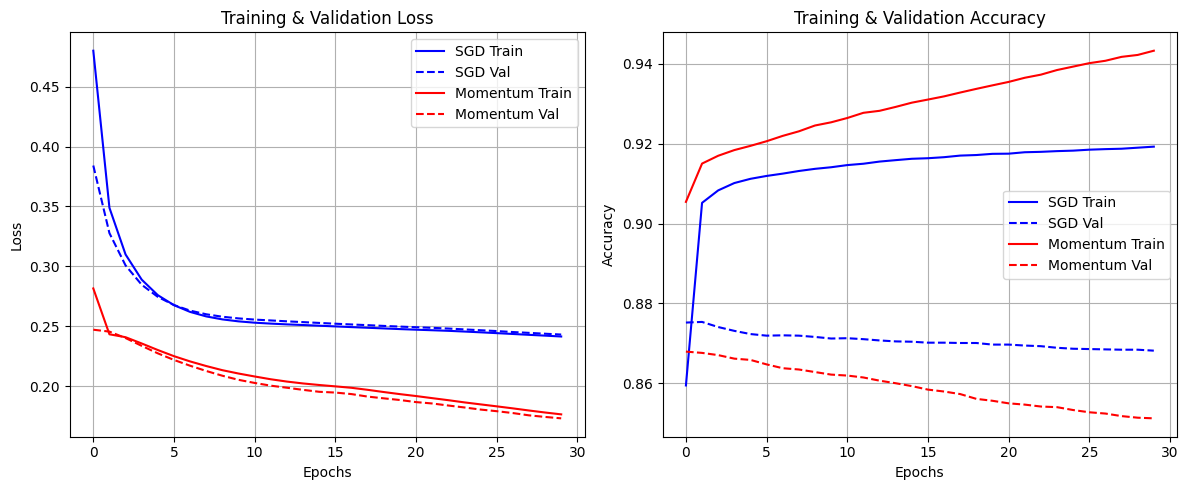

In [5]:
# Plot comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_sgd['loss'], 'b-', label='SGD Train')
plt.plot(history_sgd['val_loss'], 'b--', label='SGD Val')
plt.plot(history_momentum['loss'], 'r-', label='Momentum Train')
plt.plot(history_momentum['val_loss'], 'r--', label='Momentum Val')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_sgd['acc'], 'b-', label='SGD Train')
plt.plot(history_sgd['val_acc'], 'b--', label='SGD Val')
plt.plot(history_momentum['acc'], 'r-', label='Momentum Train')
plt.plot(history_momentum['val_acc'], 'r--', label='Momentum Val')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Part 2: Multiclass with ReLU + He Initialization


In [6]:
# Multiclass classification with Momentum
optimizer2 = Momentum(learning_rate=0.01, momentum=0.9)
model2 = EnhancedNeuralNetwork([
    EnhancedDenseLayer(3072, 128, activation=ReLU),  # He initialization
    EnhancedDenseLayer(128, 64, activation=ReLU),  # He initialization
    EnhancedDenseLayer(64, 10, activation=Softmax)
], optimizer=optimizer2)

print("\nTraining multiclass with Momentum and ReLU...")
history2 = model2.train(x_train_categorical, y_train_categorical,
                      x_test_categorical, y_test_categorical,
                      epochs=50, learning_rate=0.01, batch_size=256,
                      classification_task=CategoricalClassification)



Training multiclass with Momentum and ReLU...
Epoch 1/50 | Loss: 1.9015 | Acc: 0.3157 | Val Loss: 1.6605 | Val Acc: 0.4158
Epoch 2/50 | Loss: 1.5973 | Acc: 0.4337 | Val Loss: 1.5385 | Val Acc: 0.4587
Epoch 3/50 | Loss: 1.4878 | Acc: 0.4743 | Val Loss: 1.4776 | Val Acc: 0.4824
Epoch 4/50 | Loss: 1.4122 | Acc: 0.5040 | Val Loss: 1.4372 | Val Acc: 0.4925
Epoch 5/50 | Loss: 1.3527 | Acc: 0.5243 | Val Loss: 1.4115 | Val Acc: 0.5004
Epoch 6/50 | Loss: 1.3023 | Acc: 0.5437 | Val Loss: 1.3972 | Val Acc: 0.5043
Epoch 7/50 | Loss: 1.2569 | Acc: 0.5580 | Val Loss: 1.3869 | Val Acc: 0.5091
Epoch 8/50 | Loss: 1.2160 | Acc: 0.5731 | Val Loss: 1.3860 | Val Acc: 0.5155
Epoch 9/50 | Loss: 1.1791 | Acc: 0.5889 | Val Loss: 1.3849 | Val Acc: 0.5199
Epoch 10/50 | Loss: 1.1442 | Acc: 0.6008 | Val Loss: 1.3882 | Val Acc: 0.5191
Epoch 11/50 | Loss: 1.1123 | Acc: 0.6118 | Val Loss: 1.3974 | Val Acc: 0.5188
Epoch 12/50 | Loss: 1.0824 | Acc: 0.6223 | Val Loss: 1.4031 | Val Acc: 0.5185
Epoch 13/50 | Loss: 1.0524

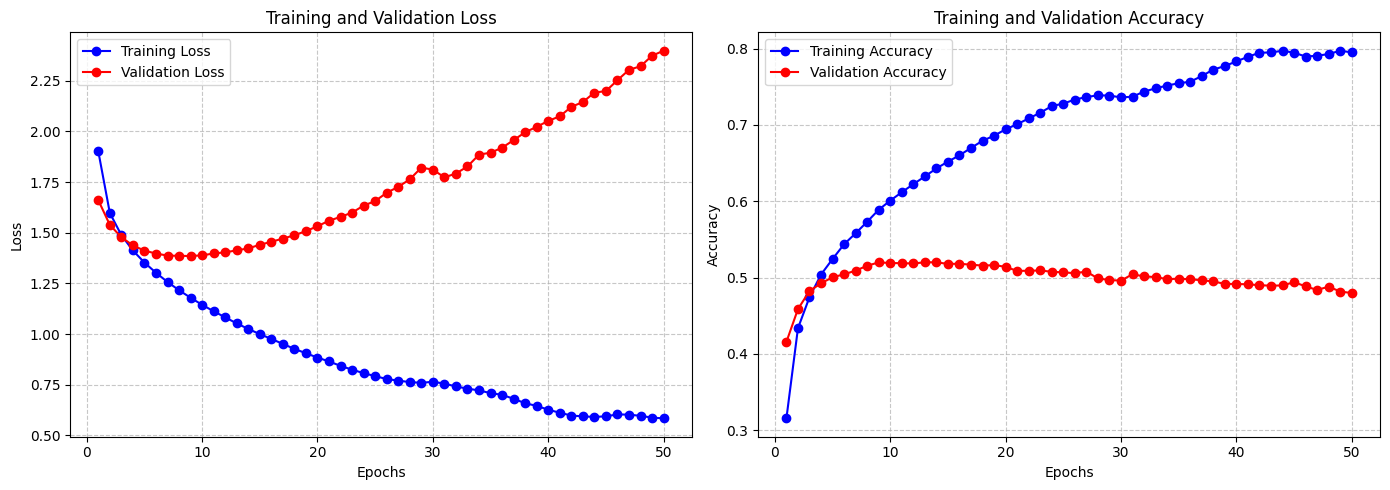

In [7]:
# Plotting history and accuracy
plot_history(history2)


### Part 3: Activation Function Comparison (Sigmoid vs ReLU vs Tanh)


In [8]:
activations = [Sigmoid, ReLU, Tanh]
histories = []

for activation in activations:
    print(f"\nTraining with {activation.__name__} activation...")
    optimizer = Momentum(learning_rate=0.01, momentum=0.9)
    model = EnhancedNeuralNetwork([
        EnhancedDenseLayer(3072, 128, activation=activation),
        EnhancedDenseLayer(128, 64, activation=activation),
        EnhancedDenseLayer(64, 10, activation=Softmax)
    ], optimizer=optimizer)

    history = model.train(x_train_categorical, y_train_categorical,
                          x_test_categorical, y_test_categorical,
                          epochs=30, learning_rate=0.01, batch_size=256,
                          classification_task=CategoricalClassification)
    histories.append((activation.__name__, history))



Training with Sigmoid activation...
Epoch 1/30 | Loss: 2.2987 | Acc: 0.1157 | Val Loss: 2.2801 | Val Acc: 0.1494
Epoch 2/30 | Loss: 2.2039 | Acc: 0.1881 | Val Loss: 2.1163 | Val Acc: 0.2091
Epoch 3/30 | Loss: 2.0642 | Acc: 0.2327 | Val Loss: 2.0197 | Val Acc: 0.2492
Epoch 4/30 | Loss: 1.9927 | Acc: 0.2656 | Val Loss: 1.9627 | Val Acc: 0.2708
Epoch 5/30 | Loss: 1.9440 | Acc: 0.2890 | Val Loss: 1.9206 | Val Acc: 0.2888
Epoch 6/30 | Loss: 1.9082 | Acc: 0.3088 | Val Loss: 1.8902 | Val Acc: 0.3119
Epoch 7/30 | Loss: 1.8799 | Acc: 0.3231 | Val Loss: 1.8648 | Val Acc: 0.3243
Epoch 8/30 | Loss: 1.8541 | Acc: 0.3347 | Val Loss: 1.8404 | Val Acc: 0.3354
Epoch 9/30 | Loss: 1.8289 | Acc: 0.3444 | Val Loss: 1.8162 | Val Acc: 0.3429
Epoch 10/30 | Loss: 1.8050 | Acc: 0.3531 | Val Loss: 1.7939 | Val Acc: 0.3501
Epoch 11/30 | Loss: 1.7840 | Acc: 0.3599 | Val Loss: 1.7749 | Val Acc: 0.3610
Epoch 12/30 | Loss: 1.7662 | Acc: 0.3668 | Val Loss: 1.7590 | Val Acc: 0.3684
Epoch 13/30 | Loss: 1.7503 | Acc: 0.

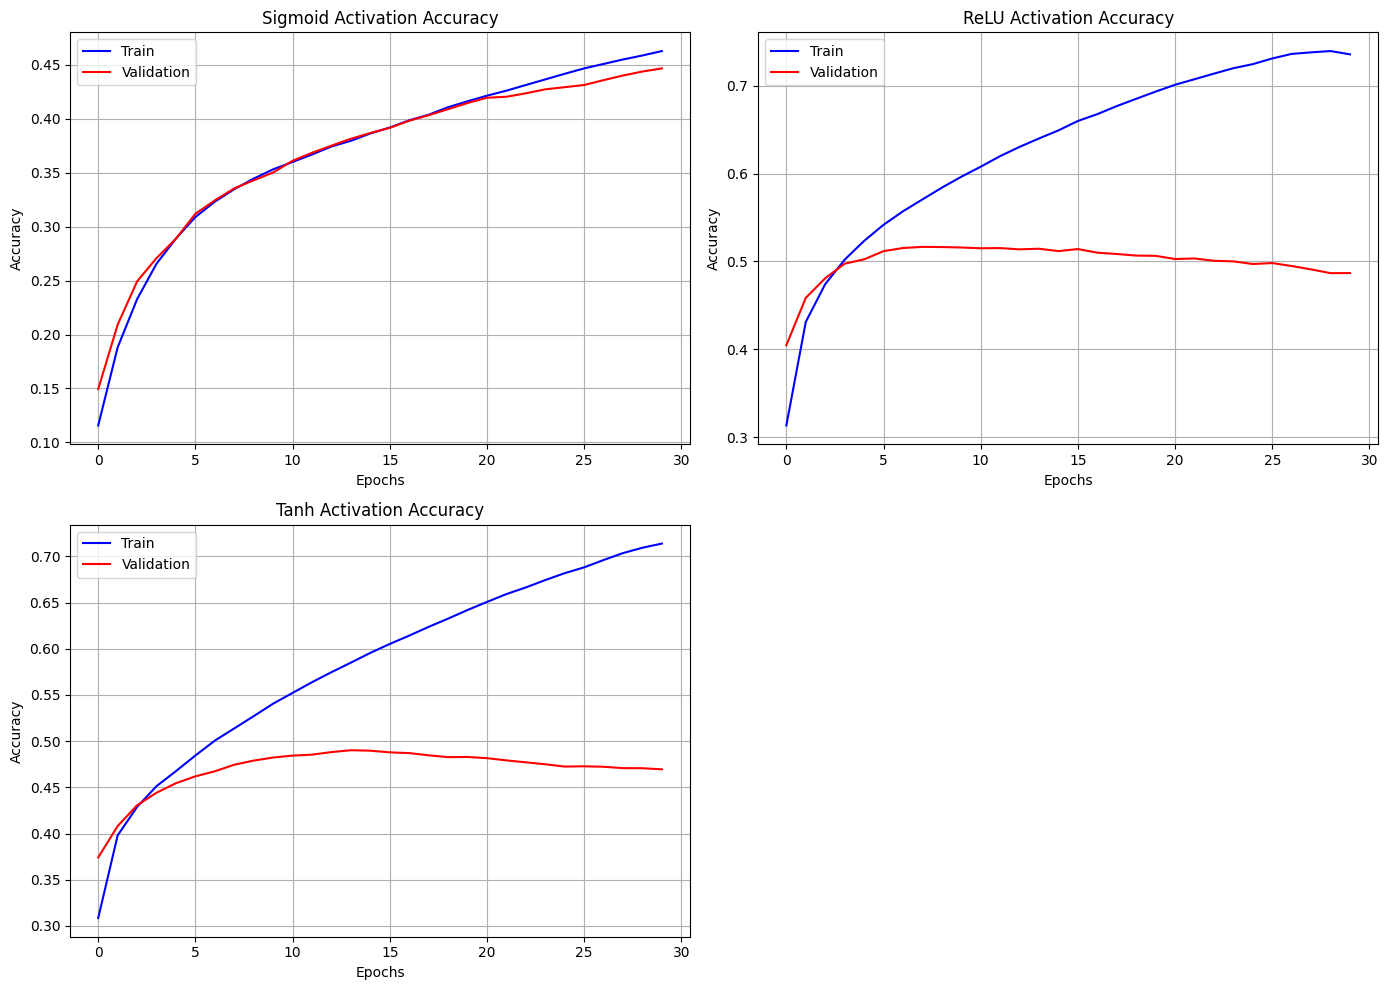

In [9]:
# Plot comparison
plt.figure(figsize=(14, 10))
for i, (name, history) in enumerate(histories):
    plt.subplot(2, 2, i + 1)
    plt.plot(history['acc'], 'b-', label='Train')
    plt.plot(history['val_acc'], 'r-', label='Validation')
    plt.title(f'{name} Activation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()


### Part 4: Optimizer Comparison (SGD vs Momentum vs Adam - Optional)


In [10]:
optimizers = [
    ('SGD', SGD(learning_rate=0.01)),
    ('Momentum', Momentum(learning_rate=0.01, momentum=0.9)),
    ('Adam', Adam(learning_rate=0.001))
]

histories = []

for name, optimizer in optimizers:
    print(f"\nTraining with {name} optimizer...")
    model = EnhancedNeuralNetwork([
        EnhancedDenseLayer(3072, 128, activation=ReLU),
        EnhancedDenseLayer(128, 64, activation=ReLU),
        EnhancedDenseLayer(64, 10, activation=Softmax)
    ], optimizer=optimizer)

    history = model.train(x_train_categorical, y_train_categorical,
                          x_test_categorical, y_test_categorical,
                          epochs=30, learning_rate=0.01, batch_size=256,
                          classification_task=CategoricalClassification)
    histories.append((name, history))



Training with SGD optimizer...
Epoch 1/30 | Loss: 2.2175 | Acc: 0.2091 | Val Loss: 2.1062 | Val Acc: 0.2543
Epoch 2/30 | Loss: 2.0313 | Acc: 0.2731 | Val Loss: 1.9604 | Val Acc: 0.3008
Epoch 3/30 | Loss: 1.9179 | Acc: 0.3148 | Val Loss: 1.8721 | Val Acc: 0.3297
Epoch 4/30 | Loss: 1.8414 | Acc: 0.3444 | Val Loss: 1.8083 | Val Acc: 0.3577
Epoch 5/30 | Loss: 1.7840 | Acc: 0.3651 | Val Loss: 1.7585 | Val Acc: 0.3760
Epoch 6/30 | Loss: 1.7384 | Acc: 0.3826 | Val Loss: 1.7182 | Val Acc: 0.3911
Epoch 7/30 | Loss: 1.7014 | Acc: 0.3952 | Val Loss: 1.6858 | Val Acc: 0.4035
Epoch 8/30 | Loss: 1.6705 | Acc: 0.4070 | Val Loss: 1.6588 | Val Acc: 0.4157
Epoch 9/30 | Loss: 1.6435 | Acc: 0.4175 | Val Loss: 1.6351 | Val Acc: 0.4226
Epoch 10/30 | Loss: 1.6191 | Acc: 0.4267 | Val Loss: 1.6143 | Val Acc: 0.4314
Epoch 11/30 | Loss: 1.5968 | Acc: 0.4348 | Val Loss: 1.5958 | Val Acc: 0.4380
Epoch 12/30 | Loss: 1.5762 | Acc: 0.4431 | Val Loss: 1.5789 | Val Acc: 0.4431
Epoch 13/30 | Loss: 1.5570 | Acc: 0.4497 

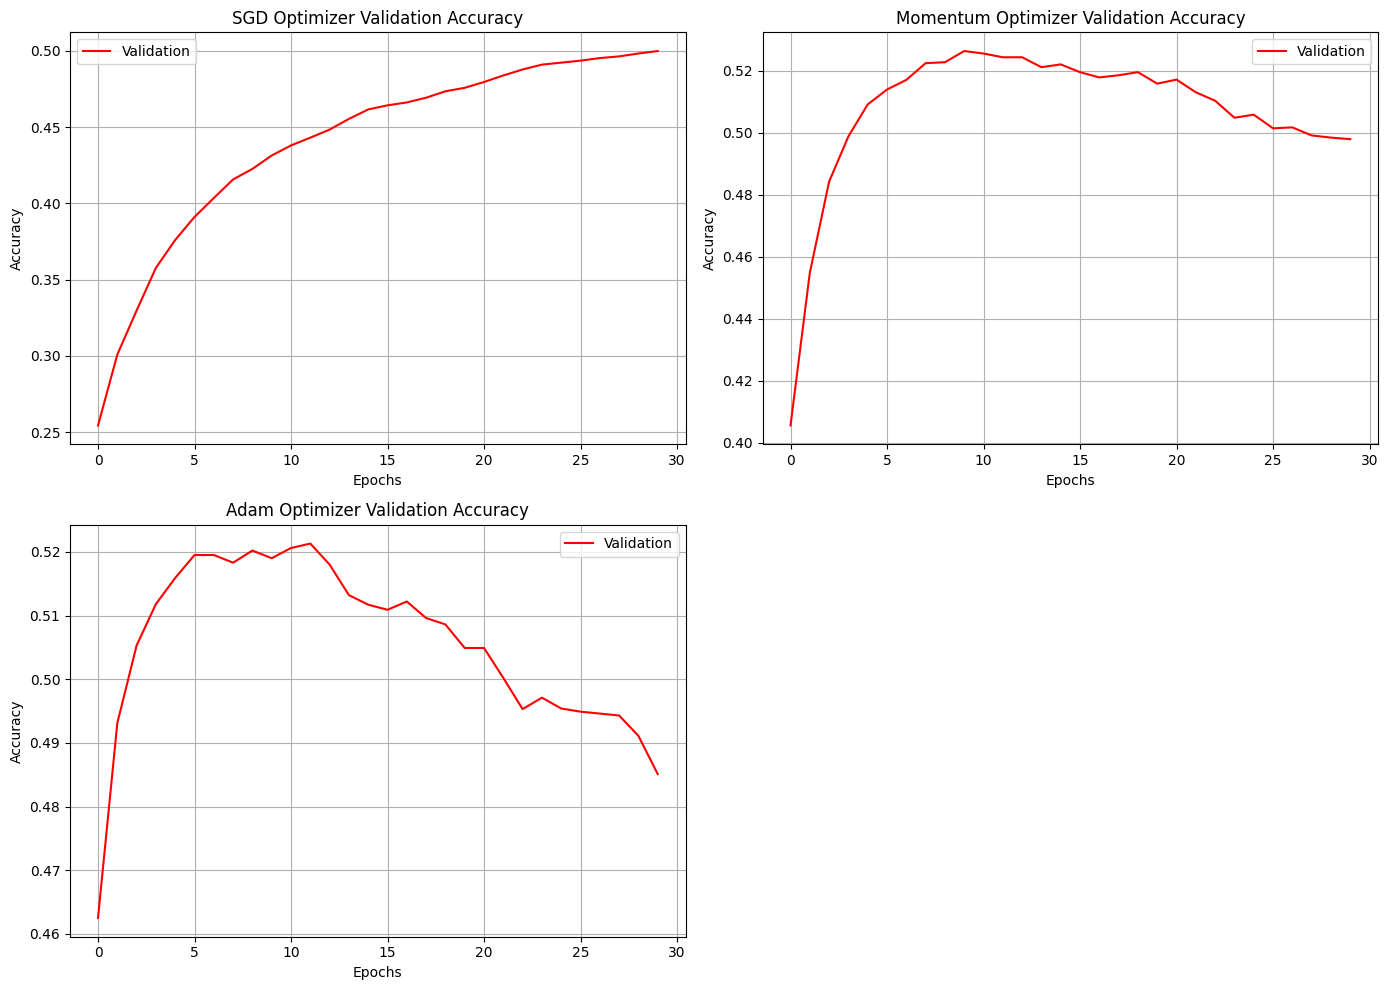

In [11]:
# Plot comparison
plt.figure(figsize=(14, 10))
for i, (name, history) in enumerate(histories):
    plt.subplot(2, 2, i + 1)
    plt.plot(history['val_acc'], 'r-', label='Validation')
    plt.title(f'{name} Optimizer Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()